Episode 50: Total Reward = 145
Episode 100: Total Reward = 159
Episode 150: Total Reward = 149
Episode 200: Total Reward = 152
Episode 250: Total Reward = 124
Episode 300: Total Reward = 136
Episode 350: Total Reward = 151
Episode 400: Total Reward = 157
Episode 450: Total Reward = 135
Episode 500: Total Reward = 149


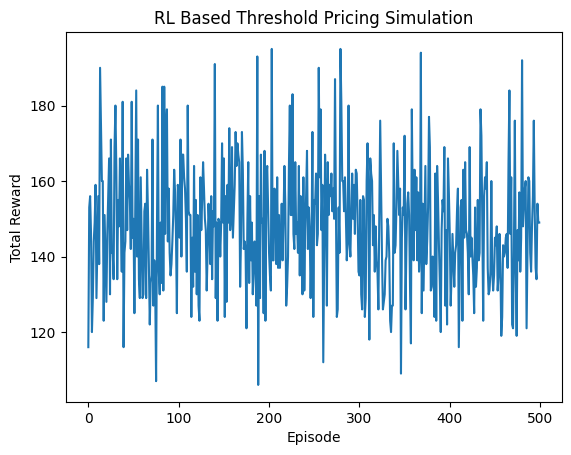

In [1]:
import numpy as np
import gym
from gym import spaces
import random
import matplotlib.pyplot as plt

class ThresholdPricingEnv(gym.Env):
    """
    A simple simulation environment for threshold pricing.
    The agent chooses a threshold price (action) and receives a reward based on a simulated customer's willingness to pay.
    """
    def __init__(self):
        super(ThresholdPricingEnv, self).__init__()
        # Define action space: discrete actions 0-9 correspond to threshold prices 1 to 10.
        self.action_space = spaces.Discrete(10)
        # Define observation space: a single integer representing market demand (or a similar state variable).
        self.observation_space = spaces.Box(low=0, high=100, shape=(1,), dtype=np.float32)
        self.state = None

    def reset(self):
        # Initialize the state; for example, a random demand between 10 and 50.
        self.state = np.array([np.random.randint(10, 50)], dtype=np.float32)
        return self.state

    def step(self, action):
        """
        Executes one time step within the environment.
        :param action: integer from 0 to 9 corresponding to a threshold price (action+1)
        :return: tuple (next_state, reward, done, info)
        """
        # Map action to threshold price (e.g., action=0 -> price=1, action=9 -> price=10)
        threshold_price = action + 1
        # Simulate customer's willingness to pay (WTP) uniformly between 1 and 10.
        customer_wtp = np.random.uniform(1, 10)
        # If threshold is acceptable to the customer, reward is the threshold price; else, no reward.
        reward = threshold_price if threshold_price <= customer_wtp else 0
        # Transition: update state (here we simply generate a new random demand)
        self.state = np.array([np.random.randint(10, 50)], dtype=np.float32)
        # In this simulation, the episode can be continuous. You can add a condition to end an episode if needed.
        done = False
        return self.state, reward, done, {}

if __name__ == "__main__":
    # Create the environment
    env = ThresholdPricingEnv()
    num_actions = env.action_space.n

    # Initialize Q-table; assuming state is an integer in [0, 100].
    Q_table = np.zeros((101, num_actions))

    # Q-learning hyperparameters
    alpha = 0.1        # Learning rate
    gamma = 0.95       # Discount factor
    epsilon = 0.1      # Exploration rate
    episodes = 500     # Total number of episodes
    steps_per_episode = 100

    rewards_all = []

    # Q-learning training loop
    for ep in range(episodes):
        state = env.reset()
        total_reward = 0
        for step in range(steps_per_episode):
            # Discretize the state (demand) for indexing in Q-table
            state_idx = int(state[0])
            # Epsilon-greedy action selection
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q_table[state_idx])
            # Take action and observe reward and next state
            next_state, reward, done, _ = env.step(action)
            next_state_idx = int(next_state[0])
            # Q-learning update rule
            best_next_action = np.argmax(Q_table[next_state_idx])
            td_target = reward + gamma * Q_table[next_state_idx, best_next_action]
            td_error = td_target - Q_table[state_idx, action]
            Q_table[state_idx, action] += alpha * td_error

            state = next_state
            total_reward += reward
            if done:
                break
        rewards_all.append(total_reward)
        if (ep + 1) % 50 == 0:
            print(f"Episode {ep+1}: Total Reward = {total_reward}")

    # Plot total reward per episode to visualize learning progress
    plt.plot(rewards_all)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("RL Based Threshold Pricing Simulation")
    plt.show()
